# Make 1-D particle in a 4 well potential using equation of velocity verlet 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import math
from sympy import *

In [77]:
# functions 

def ke(v):
    return (v*v)/2

def pe(x):
    if(x<= -1.25):
        return 4*pie*pie*(x+1.25)*(x+1.25)
    if(x > -1.25 and x <= -0.25):
        return 2*(1+math.sin(2*pie*x))
    if(x > -0.25 and x <= 0.75):
        return 3*(1+math.sin(2*pie*x))
    if(x > 0.75 and x <= 1.75):
        return 4*(1+math.sin(2*pie*x))
    return 8*pie*pie*(x-1.75)*(x-1.75)

def find_acc(x):
    if(x<= -1.25):
        return -4*pie**2*(2.0*x + 2.5)
    if(x > -1.25 and x <= -0.25):
        return -4*pie*math.cos(2*pie*x)
    if(x > -0.25 and x <= 0.75):
        return -6*pie*math.cos(2*pie*x)
    if(x > 0.75 and x <= 1.75):
        return -8*pie*math.cos(2*pie*x)
    return -8*pie**2*(2.0*x - 3.5)

In [142]:
# initial conditions 
s = 10000
t = 0.01
vi = 4
pie = np.pi
X = np.zeros(s)
V = np.zeros(s)
H = np.zeros(s)
x1 = np.linspace(0, 1000000, s)
x2 = np.linspace(-2, 2, s)

# lets divide -3 to 3 in 5 windows and each time we reset the sim to random V at x0 
# -3 to 3 / 100 is each window 
# s/100 is the number of steps per window
# we start at xbase = z* 6/100 + z+1 * 6/100 - 3 
kbias = 0
nw = 5

X[0] = -3
kb = 1
T = 10
KE = 1.5*kb*T
H[0] = KE + pe(X[0])
V[0] = 0
xbase = -1.6

In [143]:
xbase

-1.6

In [144]:
for i in range(s-1):
    cur_x = X[i]
    cur_v = V[i]
    if((i%(s/nw) == 0)):
        z = i/(s/nw)
        X[i] = (z*(4/nw) + (z+1)*(4/nw))/2 - 2 
        V[i] = V[0]
        xbase = X[i]
        print(z)
        print(xbase)
    a1 = find_acc(cur_x) - kbias*(xbase - cur_x)
    cur_xx = cur_x + t*cur_v + (t*t*a1)/2
    X[i+1] = cur_xx
    a2 = find_acc(cur_xx) - kbias*(xbase - cur_xx)
    cur_vv = cur_v + ((a1+a2)*t)/2
    V[i+1] = cur_vv

0.0
-1.6
1.0
-0.7999999999999998
2.0
0.0
3.0
0.8000000000000003
4.0
1.6


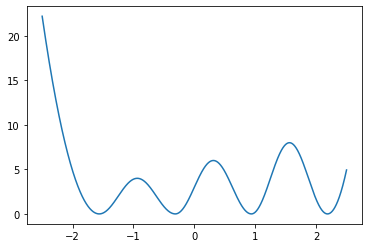

In [145]:
plt.plot(np.linspace(-2.5, 2.5, s), np.array([pe(xi) for xi in x2]))

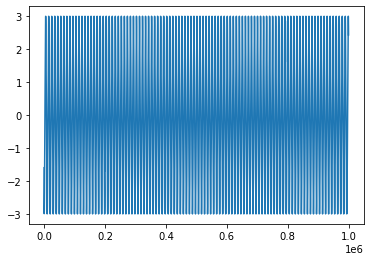

In [146]:
plt.plot(x1, X)

1.6

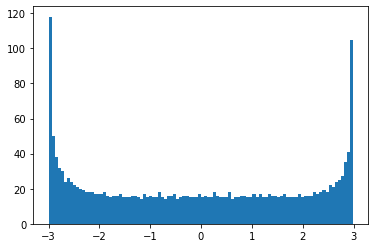

In [136]:
plt.hist(X[s-s//nw:s], bins=100)
X[s-s//nw]

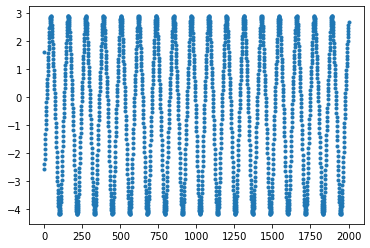

In [99]:
x2 = np.linspace(0, s//nw, s//nw)
plt.plot(x2, X[s-s//nw:s], ".")

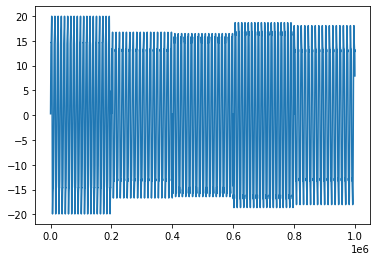

In [100]:
plt.plot(x1, V)

In [138]:
with open('readme.txt', 'w') as f:
    for i in range(s):
        f.write(str(X[i])+ '\n')

In [ ]:
## TODO

1. Simulate a molecule. {H20}
    - Load pdb coordinates, visualize 
    - Load bond, angles, dihedral connection info, ....
    - Implement forcefield
    - MD code (along w/ thermostats)

2. Simple US on 4D well. 

3. US on NAMD to understand. 

4. Custom US on a molecule.  